In [1]:
import pickle
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
splits = ['scaffold', 'random']
datasets = ['pdbbind', 'platinum']
tasks = ['all', 'easy', 'hard']
results_dir = 'results/'
iterations = range(5)

In [3]:
bioactive_accuracy_df = pd.DataFrame()
regression_df = pd.DataFrame()
ranking_df = pd.DataFrame()

In [4]:
for split in splits :

    for iteration in iterations :
        
        for dataset in datasets :
            
            experiment_name = f'{split}_split_{iteration}_new'
            evaluation_name = f'{experiment_name}_{dataset}'
            
            working_dir = os.path.join(results_dir, evaluation_name)
            for task in tasks :
                dataset_results_path = os.path.join(working_dir, f'dataset_results_{task}.p')
                with open(dataset_results_path, 'rb') as f:
                    dataset_results = pickle.load(f)

                dataset_results['bioactive_accuracy']['split'] = split
                dataset_results['bioactive_accuracy']['dataset'] = dataset
                dataset_results['bioactive_accuracy']['task'] = task
                bioactive_accuracy_df = bioactive_accuracy_df.append(pd.Series(dataset_results['bioactive_accuracy']), ignore_index=True)

                for average_type in dataset_results['regression'] :
                    dataset_results['regression'][average_type]['split'] = split
                    dataset_results['regression'][average_type]['dataset'] = dataset
                    dataset_results['regression'][average_type]['task'] = task
                    dataset_results['regression'][average_type]['average_type'] = average_type
                    regression_df = regression_df.append(pd.Series(dataset_results['regression'][average_type]), ignore_index=True)

                for ranker in dataset_results['ranking'] :
                    dataset_results['ranking'][ranker]['split'] = split
                    dataset_results['ranking'][ranker]['dataset'] = dataset
                    dataset_results['ranking'][ranker]['task'] = task
                    dataset_results['ranking'][ranker]['ranker'] = ranker
                    ranking_df = ranking_df.append(pd.Series(dataset_results['ranking'][ranker]), ignore_index=True)

In [5]:
split = 'protein'
for iteration in iterations :
        
    for dataset in datasets :

        experiment_name = f'protein_split_{iteration}_v2'
        evaluation_name = f'{experiment_name}_{dataset}'

        working_dir = os.path.join(results_dir, evaluation_name)
        for task in tasks :
            dataset_results_path = os.path.join(working_dir, f'dataset_results_{task}.p')
            if os.path.exists(dataset_results_path) :
                with open(dataset_results_path, 'rb') as f:
                    dataset_results = pickle.load(f)

                dataset_results['bioactive_accuracy']['split'] = split
                dataset_results['bioactive_accuracy']['dataset'] = dataset
                dataset_results['bioactive_accuracy']['task'] = task
                bioactive_accuracy_df = bioactive_accuracy_df.append(pd.Series(dataset_results['bioactive_accuracy']), ignore_index=True)

                for average_type in dataset_results['regression'] :
                    dataset_results['regression'][average_type]['split'] = split
                    dataset_results['regression'][average_type]['dataset'] = dataset
                    dataset_results['regression'][average_type]['task'] = task
                    dataset_results['regression'][average_type]['average_type'] = average_type
                    regression_df = regression_df.append(pd.Series(dataset_results['regression'][average_type]), ignore_index=True)

                for ranker in dataset_results['ranking'] :
                    dataset_results['ranking'][ranker]['split'] = split
                    dataset_results['ranking'][ranker]['dataset'] = dataset
                    dataset_results['ranking'][ranker]['task'] = task
                    dataset_results['ranking'][ranker]['ranker'] = ranker
                    ranking_df = ranking_df.append(pd.Series(dataset_results['ranking'][ranker]), ignore_index=True)
            else :
                print(f'No results for {dataset_results_path}')

In [6]:
regression_df['subset'] = regression_df['task']

In [7]:
regression_df.head()

,average_type,dataset,pearson_all,pearson_gen,r2_all,r2_gen,rmse_all,rmse_bio,rmse_gen,spearman_all,spearman_gen,split,task,subset
0,Micro,pdbbind,0.689521,0.567977,0.450388,0.238226,0.669606,1.265954,0.766134,0.655899,0.533931,scaffold,all,all
1,Macro,pdbbind,0.297655,0.279259,-234.883365,-2.307181,0.604589,1.309320,0.575705,0.265436,0.259358,scaffold,all,all
2,Micro,pdbbind,0.546336,0.394333,0.201584,-0.070747,0.632294,0.877439,0.688070,0.483965,0.323763,scaffold,easy,easy
3,Macro,pdbbind,0.258632,0.265825,-756.578440,-5.086273,0.551283,0.911603,0.501463,0.241462,0.244717,scaffold,easy,easy
4,Micro,pdbbind,0.674382,0.546974,0.427680,0.207229,0.673739,1.461832,0.774228,0.640515,0.512547,scaffold,hard,hard


In [8]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.6680171847343445
0.018861150017331133


In [9]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['r2_all'].mean())
print(data['r2_all'].std())

0.457493839755721
0.02694025254031857


In [26]:
data = regression_df[(regression_df['split'] == 'random') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.6502212166786194
0.030275720073356584


In [27]:
data = regression_df[(regression_df['split'] == 'random') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['r2_all'].mean())
print(data['r2_all'].std())

0.5023205204651069
0.04132825803835681


In [16]:
data = regression_df[(regression_df['split'] == 'protein') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.7095790803432465
0.028335452694419592


In [17]:
data = regression_df[(regression_df['split'] == 'protein') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['r2_all'].mean())
print(data['r2_all'].std())

0.46354424089398977
0.019708117235397664


In [21]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'easy')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.5773382663726807
0.054037293854987865


In [28]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'easy')]
print(data['r2_all'].mean())
print(data['r2_all'].std())

0.22154963532205244
0.025551978261545722


In [22]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'hard')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.6790533423423767
0.015866336339159553


In [29]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'hard')]
print(data['r2_all'].mean())
print(data['r2_all'].std())

0.42446860896868116
0.01901133980567409


In [23]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['rmse_gen'].mean())
print(data['rmse_gen'].std())

0.7605202794075012
0.0376882738933082


In [24]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'pdbbind')
                    & (regression_df['task'] == 'all')]
print(data['rmse_bio'].mean())
print(data['rmse_bio'].std())

1.2233079433441163
0.1154986658193408


In [30]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'platinum')
                    & (regression_df['task'] == 'all')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.5989255309104919
0.03355303256266806


In [31]:
data = regression_df[(regression_df['split'] == 'scaffold') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'platinum')
                    & (regression_df['task'] == 'all')]
print(data['r2_all'].mean())
print(data['r2_all'].std())

0.4552433758841021
0.06288703037794334


In [17]:
data = regression_df[(regression_df['split'] == 'random') 
                     & (regression_df['average_type'] == 'Micro')
                    & (regression_df['dataset'] == 'platinum')
                    & (regression_df['task'] == 'all')]
print(data['rmse_all'].mean())
print(data['rmse_all'].std())

0.5809468030929565
0.007979834854330218


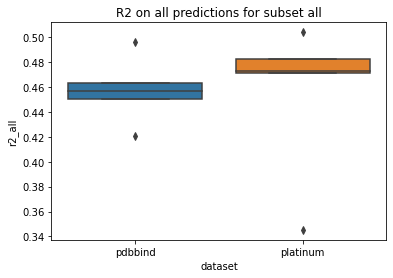

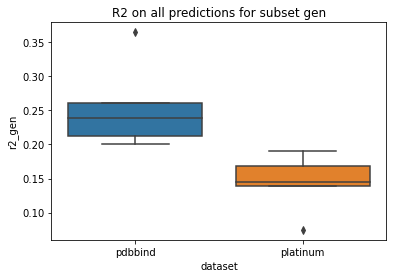

In [8]:
data = regression_df[(regression_df['split'] == 'scaffold') & (regression_df['average_type'] == 'Micro') & (regression_df['task'] == 'all')]
for subset in ['all', 'gen'] :
    sns.boxplot(data=data, x='dataset', y=f'r2_{subset}')
    plt.title(f'R2 on all predictions for subset {subset}')
    plt.savefig(f'figures/r2_{subset}.png', dpi=200)
    plt.show()

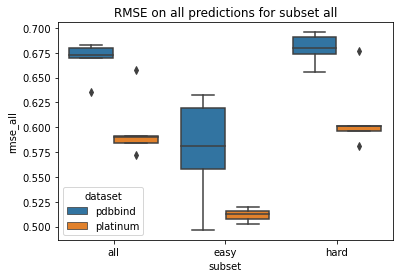

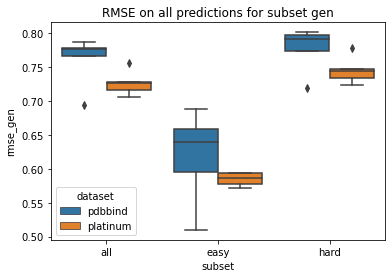

In [9]:
data = regression_df[(regression_df['split'] == 'scaffold') & (regression_df['average_type'] == 'Micro')]
for subset in ['all', 'gen'] :
    sns.boxplot(data=data, x='subset', y=f'rmse_{subset}', hue='dataset')
    plt.title(f'RMSE on all predictions for subset {subset}')
    plt.savefig(f'figures/rmse_{subset}.png', dpi=200)
    plt.show()

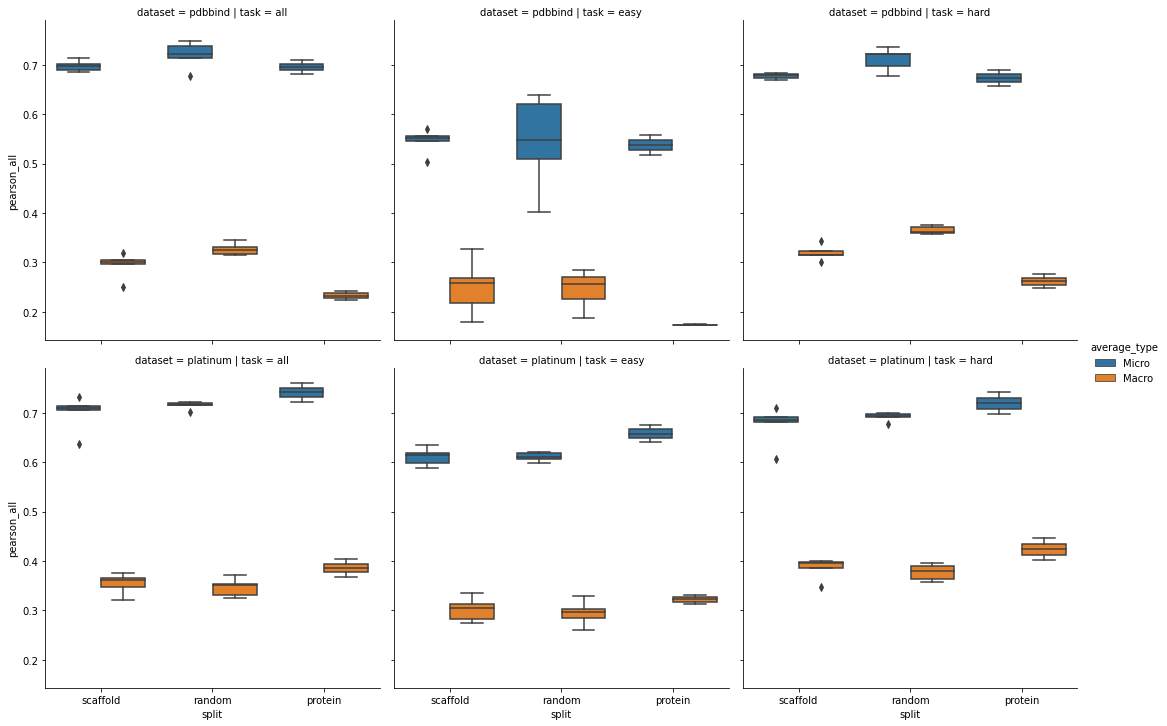

In [10]:
sns.catplot(data=regression_df, x='split', y='pearson_all', hue='average_type', row='dataset', col='task', kind='box')

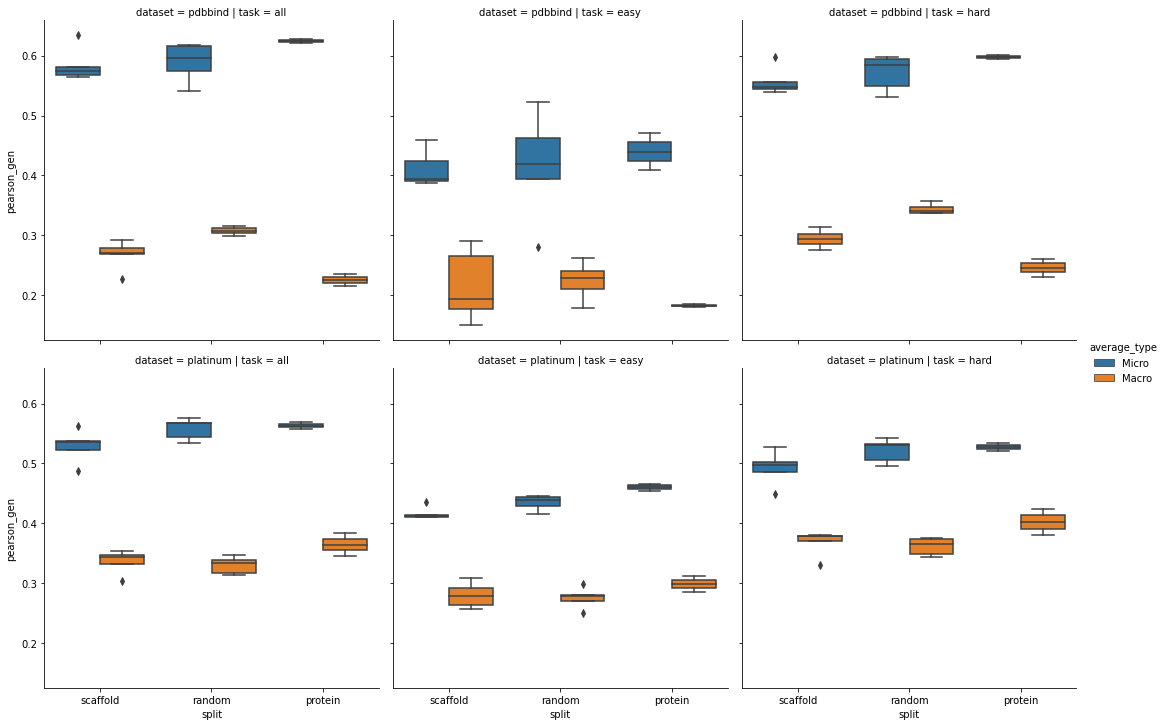

In [11]:
sns.catplot(data=regression_df, x='split', y='pearson_gen', hue='average_type', row='dataset', col='task', kind='box')

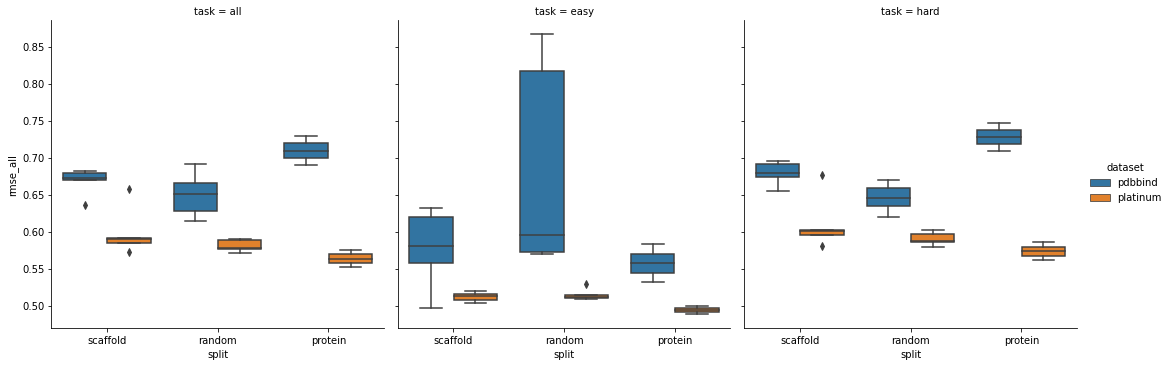

In [19]:
sns.catplot(data=regression_df[regression_df['average_type'] == 'Micro'], 
            x='split', y='rmse_all', hue='dataset', col='task', kind='box')

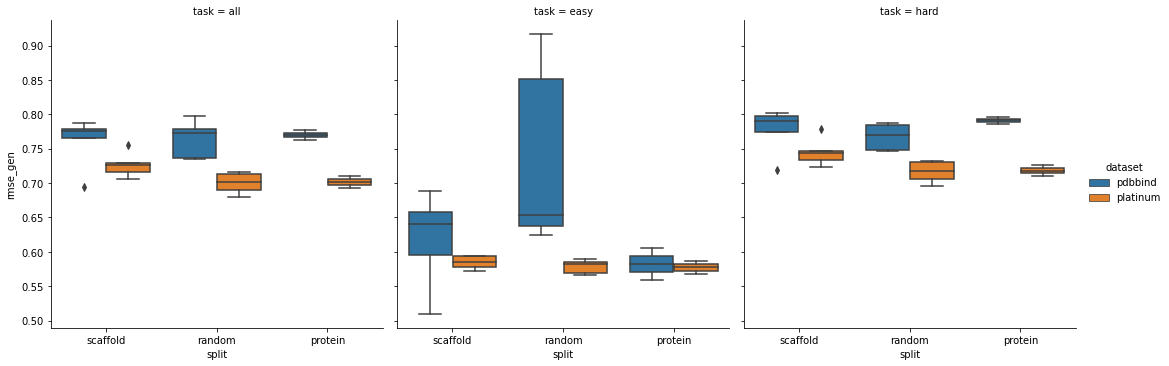

In [20]:
sns.catplot(data=regression_df[regression_df['average_type'] == 'Micro'], 
            x='split', y='rmse_gen', hue='dataset', col='task', kind='box')

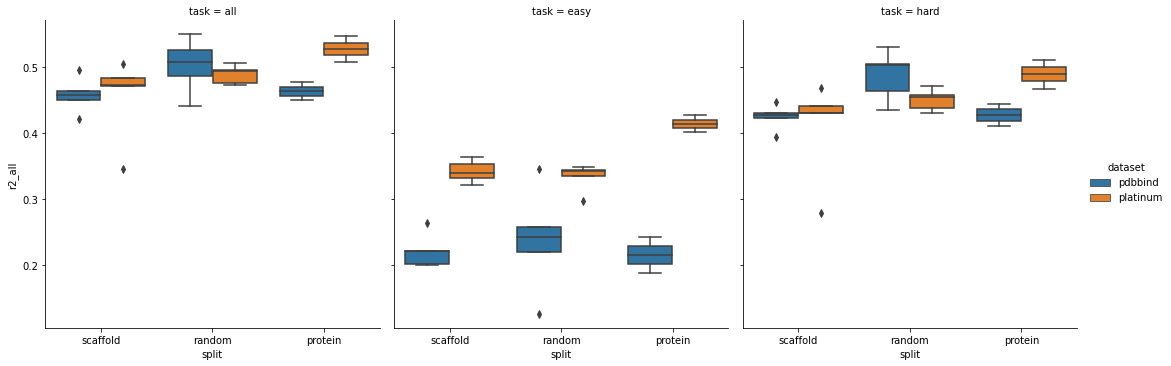

In [23]:
sns.catplot(data=regression_df[regression_df['average_type'] == 'Micro'], 
            x='split', y='r2_all', hue='dataset', col='task', kind='box')

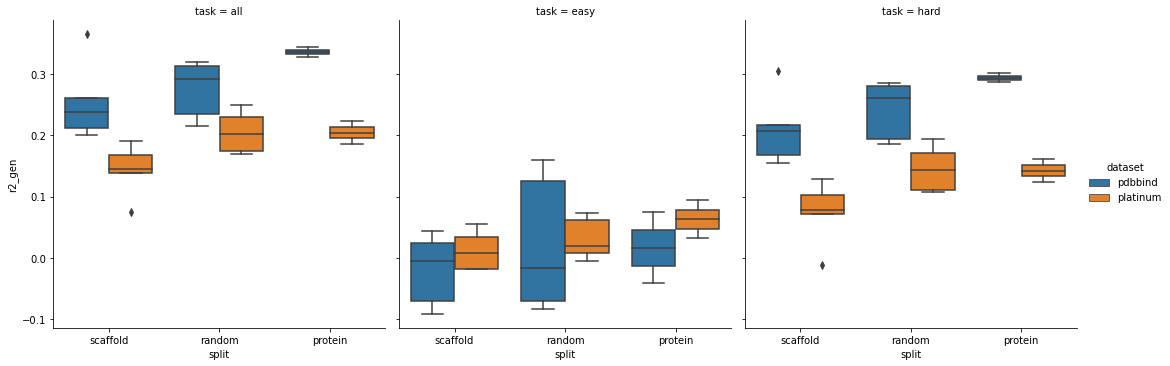

In [22]:
sns.catplot(data=regression_df[regression_df['average_type'] == 'Micro'], 
            x='split', y='r2_gen', hue='dataset', col='task', kind='box')

In [5]:
bioactive_accuracy_df['subset'] = bioactive_accuracy_df['task']

In [6]:
bioactive_accuracy_df.head()

,dataset,mean_top1_accuracy,mean_topN_accuracy,median_all_bioactive,median_min_bioactive,q1_all_bioactive,q1_min_bioactive,q3_all_bioactive,q3_min_bioactive,split,task,subset
0,pdbbind,0.313559,0.307604,5.0,4.0,0.0,0.0,25.0,24.0,scaffold,all,all
1,pdbbind,0.334347,0.324698,3.0,2.0,0.0,0.0,9.0,7.0,scaffold,easy,easy
2,pdbbind,0.304229,0.299932,8.0,8.0,0.0,0.0,35.0,35.0,scaffold,hard,hard
3,platinum,0.331867,0.333584,4.0,3.0,0.0,0.0,21.0,20.0,scaffold,all,all
4,platinum,0.341293,0.350690,2.0,2.0,0.0,0.0,7.0,6.0,scaffold,easy,easy


In [32]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'pdbbind')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['mean_top1_accuracy'].mean())
print(data['mean_top1_accuracy'].std())

0.286015491623941
0.024912322453444137


In [45]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'pdbbind')
                    & (bioactive_accuracy_df['task'] == 'easy')]
print(data['mean_top1_accuracy'].mean())
print(data['mean_top1_accuracy'].std())

0.3053511371595363
0.027179966441012823


In [34]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'pdbbind')
                    & (bioactive_accuracy_df['task'] == 'hard')]
print(data['mean_top1_accuracy'].mean())
print(data['mean_top1_accuracy'].std())

0.27674175217611585
0.03194489893179135


In [38]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'pdbbind')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['q1_min_bioactive'].mean())
print(data['q1_min_bioactive'].std())

0.2
0.447213595499958


In [37]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'pdbbind')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['median_min_bioactive'].mean())
print(data['median_min_bioactive'].std())

5.0
1.0


In [39]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'pdbbind')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['q3_min_bioactive'].mean())
print(data['q3_min_bioactive'].std())

25.2
3.271085446759225


In [40]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'platinum')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['mean_top1_accuracy'].mean())
print(data['mean_top1_accuracy'].std())

0.293908071255773
0.027074751459377173


In [41]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'platinum')
                    & (bioactive_accuracy_df['task'] == 'hard')]
print(data['mean_top1_accuracy'].mean())
print(data['mean_top1_accuracy'].std())

0.2876325088339222
0.029957287911330684


In [42]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'platinum')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['q1_min_bioactive'].mean())
print(data['q1_min_bioactive'].std())

0.0
0.0


In [43]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'platinum')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['median_min_bioactive'].mean())
print(data['median_min_bioactive'].std())

4.0
0.7071067811865476


In [44]:
data = bioactive_accuracy_df[(bioactive_accuracy_df['split'] == 'scaffold') 
                    & (bioactive_accuracy_df['dataset'] == 'platinum')
                    & (bioactive_accuracy_df['task'] == 'all')]
print(data['q3_min_bioactive'].mean())
print(data['q3_min_bioactive'].std())

22.4
2.302172886644268


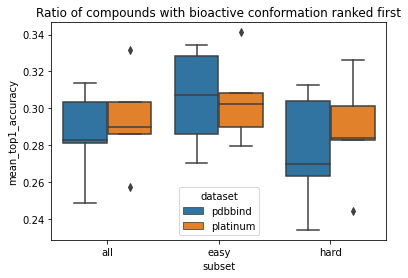

In [7]:
data = bioactive_accuracy_df[bioactive_accuracy_df['split'] == 'scaffold']
sns.boxplot(data=data, x='subset', y='mean_top1_accuracy', hue='dataset')
plt.title('Ratio of compounds with bioactive conformation ranked first')
plt.savefig('figures/mean_top1_accuracy.png', dpi=200)

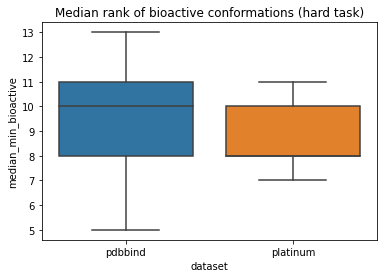

In [8]:
data = bioactive_accuracy_df[bioactive_accuracy_df['split'] == 'scaffold']
sns.boxplot(data=data[data['subset']=='hard'], x='dataset', y='median_min_bioactive')
plt.title('Median rank of bioactive conformations (hard task)')
plt.savefig('figures/median_min_bioactive.png', dpi=200)

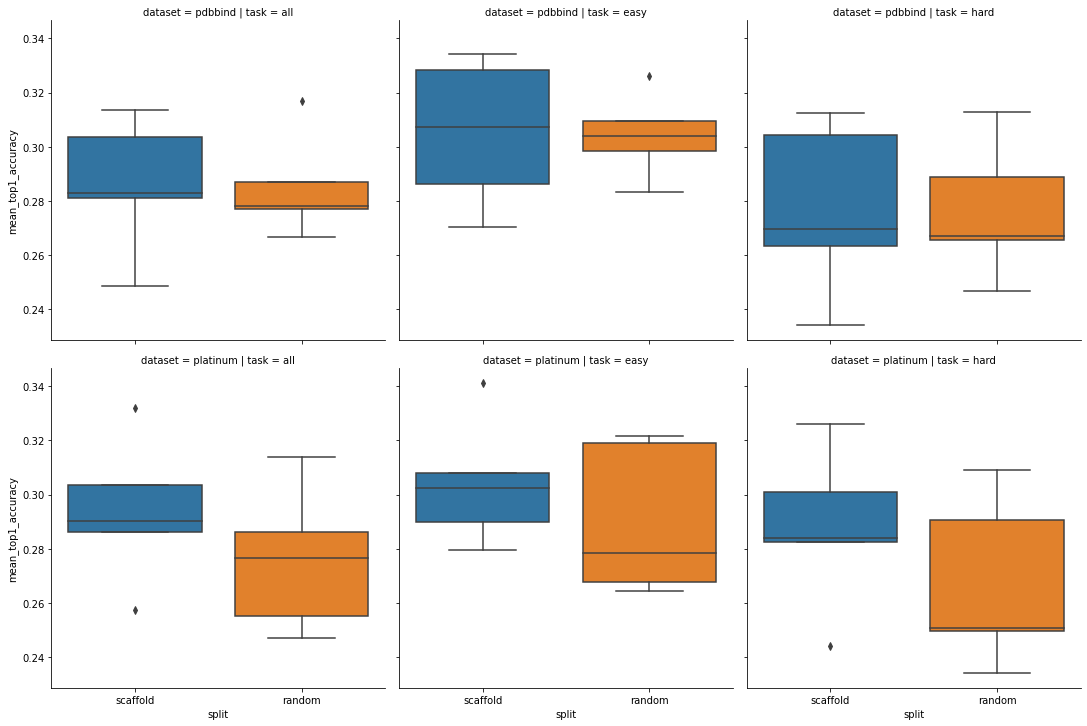

In [9]:
sns.catplot(data=bioactive_accuracy_df, x='split', y='mean_top1_accuracy', row='dataset', col='task', kind='box')

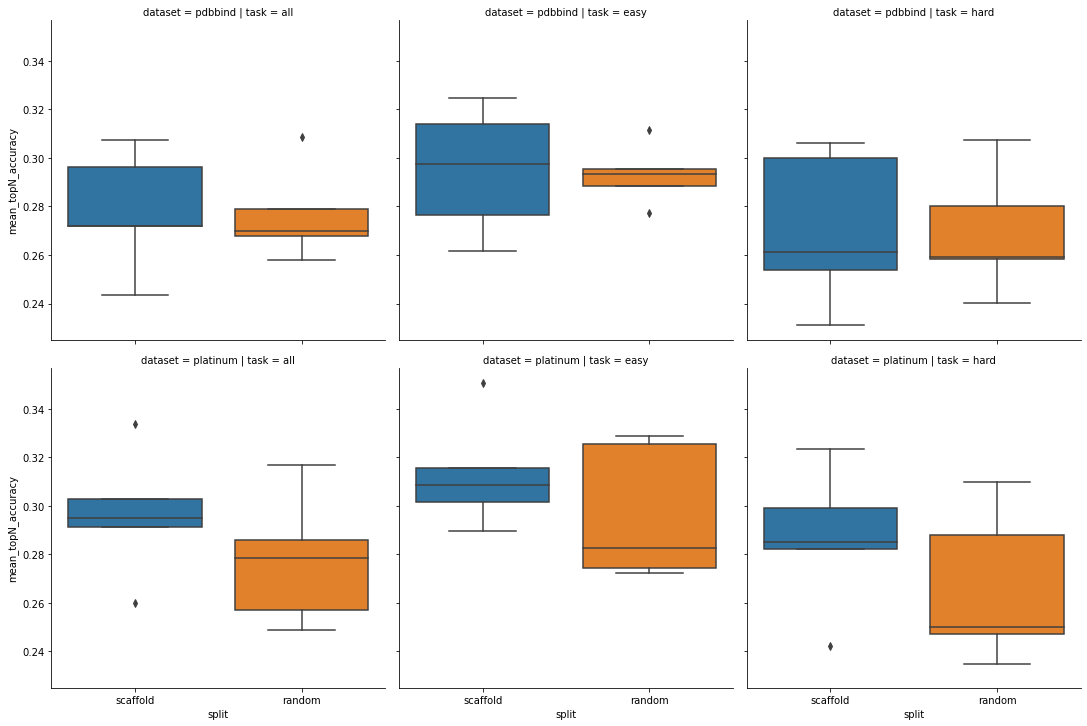

In [10]:
sns.catplot(data=bioactive_accuracy_df, x='split', y='mean_topN_accuracy', row='dataset', col='task', kind='box')

In [48]:
ranking_df['subset'] = ranking_df['task']

In [49]:
ranking_df.head()

,bedroc,dataset,ef_0.1,ef_0.2,ranker,split,task,subset
0,0.104161,pdbbind,0.930595,0.904334,random,scaffold,all,all
1,0.138178,pdbbind,1.206989,1.093396,energy,scaffold,all,all
2,0.142072,pdbbind,1.226372,1.136736,ccdc,scaffold,all,all
3,0.214825,pdbbind,1.893354,1.640988,model,scaffold,all,all
4,0.072821,pdbbind,0.730371,0.669916,random,scaffold,easy,easy


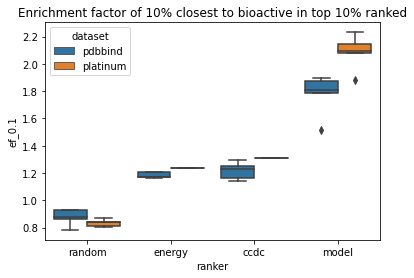

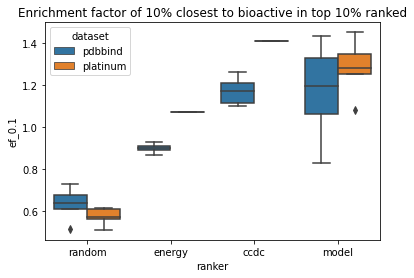

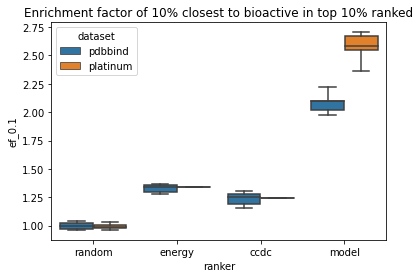

In [50]:
for subset in ['all', 'easy', 'hard'] :
    data = ranking_df[(ranking_df['split'] == 'scaffold') & (ranking_df['subset'] == subset)]
    sns.boxplot(data=data, x='ranker', y='ef_0.1', hue='dataset')
    plt.title('Enrichment factor of 10% closest to bioactive in top 10% ranked')
    plt.savefig(f'figures/ef_10_{subset}.png', dpi=200)
    plt.show()

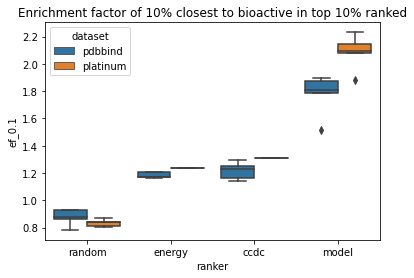

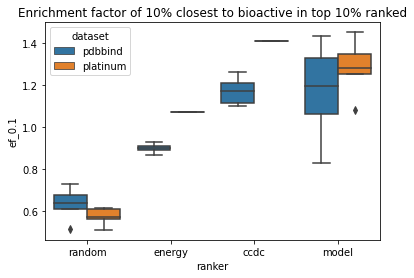

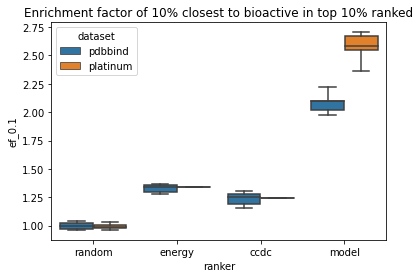

In [67]:
for subset in ['all', 'easy', 'hard'] :
    data = ranking_df[(ranking_df['split'] == 'scaffold') & (ranking_df['subset'] == subset)]
    sns.boxplot(data=data, x='ranker', y='ef_0.1', hue='dataset')
    plt.title('Enrichment factor of 10% closest to bioactive in top 10% ranked')
    plt.savefig(f'figures/ef_10_{subset}.png', dpi=200)
    plt.show()

In [55]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'all')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'model')]
data

,bedroc,dataset,ef_0.1,ef_0.2,ranker,split,task,subset
3,0.214825,pdbbind,1.893354,1.640988,model,scaffold,all,all
27,0.215116,pdbbind,1.871955,1.618561,model,scaffold,all,all
51,0.210604,pdbbind,1.810094,1.584559,model,scaffold,all,all
75,0.173821,pdbbind,1.513714,1.339526,model,scaffold,all,all
99,0.205054,pdbbind,1.787630,1.571642,model,scaffold,all,all


In [56]:
print(data['ef_0.1'].mean())
print(data['ef_0.1'].std())

1.775349560079664
0.1525358594730759


In [59]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'all')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'ccdc')]
data

,bedroc,dataset,ef_0.1,ef_0.2,ranker,split,task,subset
2,0.142072,pdbbind,1.226372,1.136736,ccdc,scaffold,all,all
26,0.132133,pdbbind,1.141919,1.088624,ccdc,scaffold,all,all
50,0.138536,pdbbind,1.162050,1.129870,ccdc,scaffold,all,all
74,0.144890,pdbbind,1.253051,1.104954,ccdc,scaffold,all,all
98,0.150880,pdbbind,1.294817,1.174084,ccdc,scaffold,all,all


In [60]:
print(data['ef_0.1'].mean())
print(data['ef_0.1'].std())

1.2156417877166217
0.0634240735025997


In [72]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'easy')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'model')]
print(data['ef_0.1'].mean())
print(data['ef_0.1'].std())

1.1719177817377695
0.2356947831246746


In [73]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'easy')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'ccdc')]
data
print(data['ef_0.1'].mean())
print(data['ef_0.1'].std())

1.1740247509620516
0.06746518982127418


In [74]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'hard')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'model')]
print(data['ef_0.1'].mean())
print(data['ef_0.1'].std())

2.0827625689542293
0.09278795288682937


In [75]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'hard')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'ccdc')]
data
print(data['ef_0.1'].mean())
print(data['ef_0.1'].std())

1.2363740112852126
0.06354900235417381


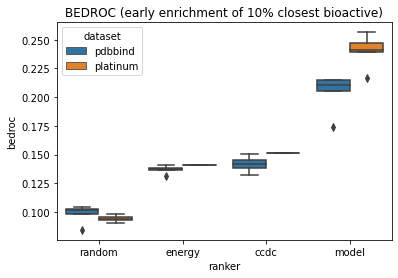

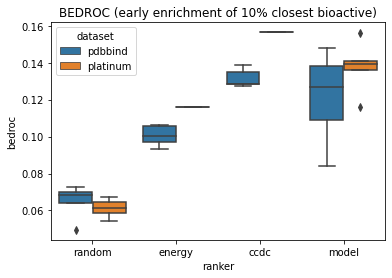

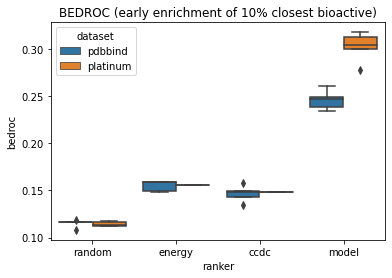

In [27]:
for subset in ['all', 'easy', 'hard'] :
    data = ranking_df[(ranking_df['split'] == 'scaffold') & (ranking_df['subset'] == subset)]
    sns.boxplot(data=data, x='ranker', y='bedroc', hue='dataset')
    plt.title('BEDROC (early enrichment of 10% closest bioactive)')
    plt.savefig(f'figures/bedroc_{subset}.png', dpi=200)
    plt.show()

In [61]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'all')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'model')]
data

,bedroc,dataset,ef_0.1,ef_0.2,ranker,split,task,subset
3,0.214825,pdbbind,1.893354,1.640988,model,scaffold,all,all
27,0.215116,pdbbind,1.871955,1.618561,model,scaffold,all,all
51,0.210604,pdbbind,1.810094,1.584559,model,scaffold,all,all
75,0.173821,pdbbind,1.513714,1.339526,model,scaffold,all,all
99,0.205054,pdbbind,1.787630,1.571642,model,scaffold,all,all


In [62]:
print(data['bedroc'].mean())
print(data['bedroc'].std())

0.20388409393535234
0.017292622011078534


In [63]:
data = ranking_df[(ranking_df['split'] == 'scaffold') 
                  & (ranking_df['subset'] == 'all')
                  & (ranking_df['dataset'] == 'pdbbind')
                  & (ranking_df['ranker'] == 'ccdc')]
data

,bedroc,dataset,ef_0.1,ef_0.2,ranker,split,task,subset
2,0.142072,pdbbind,1.226372,1.136736,ccdc,scaffold,all,all
26,0.132133,pdbbind,1.141919,1.088624,ccdc,scaffold,all,all
50,0.138536,pdbbind,1.162050,1.129870,ccdc,scaffold,all,all
74,0.144890,pdbbind,1.253051,1.104954,ccdc,scaffold,all,all
98,0.150880,pdbbind,1.294817,1.174084,ccdc,scaffold,all,all


In [64]:
print(data['bedroc'].mean())
print(data['bedroc'].std())

0.14170214565194614
0.007002195328055085


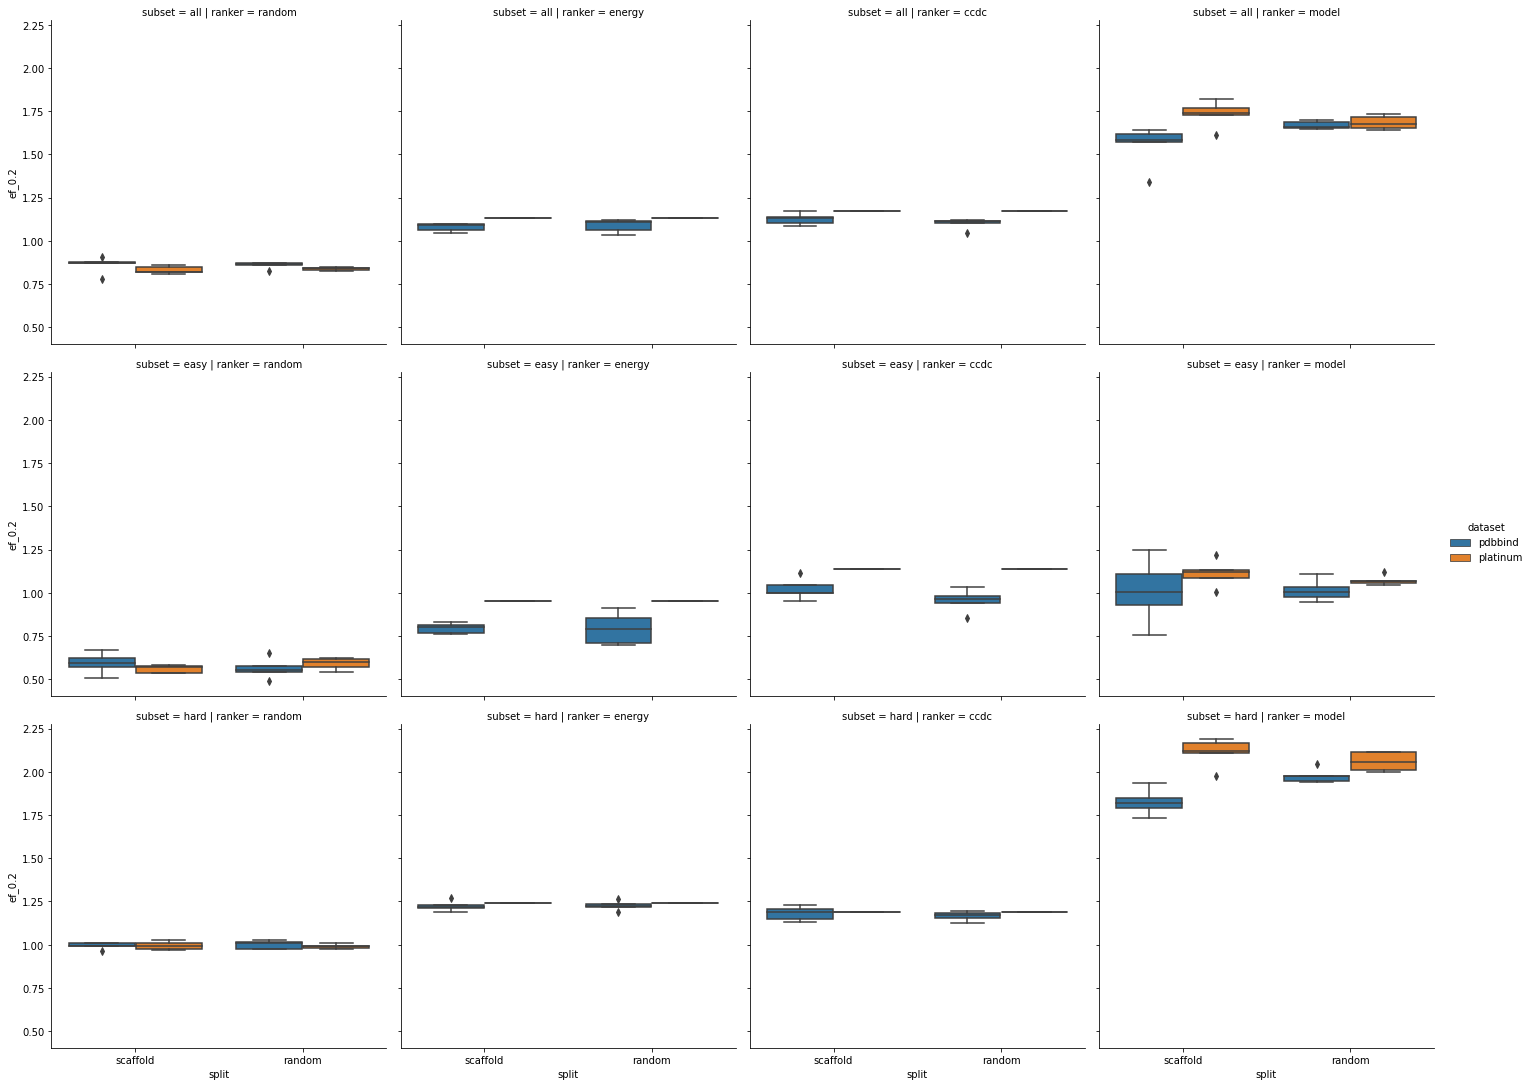

In [65]:
sns.catplot(data=ranking_df, x='split', y='ef_0.2', hue='dataset', row='subset', col='ranker', kind='box')

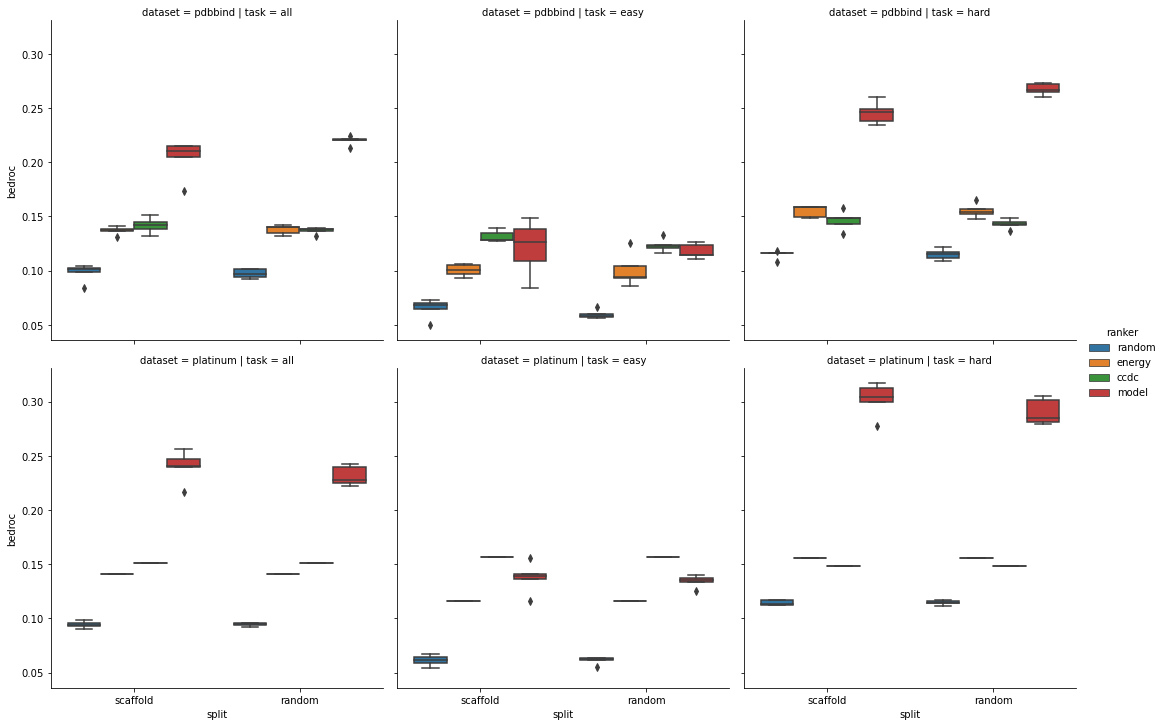

In [33]:
sns.catplot(data=ranking_df, x='split', y='bedroc', hue='ranker', row='dataset', col='task', kind='box')

In [34]:
dataset_results

{'bioactive_accuracy': {'q1_all_bioactive': 1.0,
  'median_all_bioactive': 13.0,
  'q3_all_bioactive': 45.0,
  'q1_min_bioactive': 1.0,
  'median_min_bioactive': 10.0,
  'q3_min_bioactive': 40.0,
  'mean_top1_accuracy': 0.24946996466431096,
  'mean_topN_accuracy': 0.24699141847551742,
  'split': 'random',
  'dataset': 'platinum',
  'task': 'hard'},
 'regression': {'Micro': {'rmse_all': 0.5793967,
   'rmse_gen': 0.69570005,
   'rmse_bio': 1.460689,
   'r2_all': 0.47086489565404854,
   'r2_gen': 0.19395297589302007,
   'pearson_all': 0.7002920771564061,
   'pearson_gen': 0.542203147221325,
   'spearman_all': 0.676796866106787,
   'spearman_gen': 0.5289305046209724,
   'split': 'random',
   'dataset': 'platinum',
   'task': 'hard',
   'average_type': 'Micro'},
  'Macro': {'rmse_all': 0.5403117,
   'rmse_gen': 0.5167391,
   'rmse_bio': 1.4421252,
   'r2_all': -0.3662150925498,
   'r2_gen': -0.5421303786965592,
   'pearson_all': 0.3638337258994726,
   'pearson_gen': 0.3489518002458293,
   '

In [35]:
for metric, value in dataset_results['bioactive_accuracy'].items() :
    bioactive_accuracy_df.loc[evaluation_name, metric] = value

In [36]:
bioactive_accuracy_df

,dataset,mean_top1_accuracy,mean_topN_accuracy,median_all_bioactive,median_min_bioactive,q1_all_bioactive,q1_min_bioactive,q3_all_bioactive,q3_min_bioactive,split,task,subset
0,pdbbind,0.313559,0.307604,5.0,4.0,0.0,0.0,25.0,24.0,scaffold,all,all
1,pdbbind,0.334347,0.324698,3.0,2.0,0.0,0.0,9.0,7.0,scaffold,easy,easy
2,pdbbind,0.304229,0.299932,8.0,8.0,0.0,0.0,35.0,35.0,scaffold,hard,hard
3,platinum,0.331867,0.333584,4.0,3.0,0.0,0.0,21.0,20.0,scaffold,all,all
4,platinum,0.341293,0.350690,2.0,2.0,0.0,0.0,7.0,6.0,scaffold,easy,easy
...,...,...,...,...,...,...,...,...,...,...,...,...
56,pdbbind,0.265647,0.258241,11.0,10.0,1.0,0.0,38.0,37.5,random,hard,hard
57,platinum,0.255113,0.257270,6.0,5.0,1.0,0.0,26.0,25.0,random,all,all
58,platinum,0.264415,0.274210,3.0,2.0,1.0,0.0,9.0,9.0,random,easy,easy
59,platinum,0.249470,0.246991,13.0,10.0,1.0,1.0,45.0,40.0,random,hard,hard
